In [32]:
# count the number of words in t8.shakespeare.txt using a dictionary
def count_dict(filename):
    """Count the number of words in a file using a dictionary"""
    word_count = {}
    with open(filename, 'r') as f:
        for line in f:
            for word in line.split():
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
    return word_count


In [33]:
# apply the function to t8.shakespeare.txt
word_count = count_dict('t8.shakespeare.txt')

In [41]:
# 10 most common words
most_common = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:10]
print(most_common)

[('the', 23242), ('I', 19540), ('and', 18297), ('to', 15623), ('of', 15544), ('a', 12532), ('my', 10824), ('in', 9576), ('you', 9081), ('is', 7851)]


In [35]:
from collections import Counter

def count_words(filename):
    # Open the file and read it into a list of lines
    with open(filename, 'r') as f:
        lines = f.readlines()
    # Join the lines into a single string
    text = ' '.join(lines)
    # Split the string into a list of words
    words = text.split()
    # Create a Counter object and count the occurrences of each word
    counter = Counter(words)
    # Return the counter
    return counter

# Example usage
counter = count_words('t8.shakespeare.txt')
print(counter.most_common(10))


[('the', 23242), ('I', 19540), ('and', 18297), ('to', 15623), ('of', 15544), ('a', 12532), ('my', 10824), ('in', 9576), ('you', 9081), ('is', 7851)]


In [36]:
count_words('t8.shakespeare.txt')

Counter({'This': 1105,
         'is': 7851,
         'the': 23242,
         '100th': 1,
         'Etext': 4,
         'file': 14,
         'presented': 11,
         'by': 2824,
         'Project': 13,
         'Gutenberg,': 1,
         'and': 18297,
         'in': 9576,
         'cooperation': 1,
         'with': 6722,
         'World': 5,
         'Library,': 2,
         'Inc.,': 1,
         'from': 2283,
         'their': 1934,
         'Library': 4,
         'of': 15544,
         'Future': 3,
         'Shakespeare': 45,
         'CDROMS.': 1,
         'Gutenberg': 11,
         'often': 116,
         'releases': 1,
         'Etexts': 3,
         'that': 7531,
         'are': 2917,
         'NOT': 225,
         'placed': 10,
         'Public': 1,
         'Domain!!': 1,
         '*This': 1,
         'has': 326,
         'certain': 116,
         'copyright': 7,
         'implications': 1,
         'you': 9081,
         'should': 1387,
         'read!*': 1,
         '<<THIS': 220,
     

## Execution time

In [37]:
# compare the two methods
%timeit count_dict('t8.shakespeare.txt')
%timeit count_words('t8.shakespeare.txt')


434 ms ± 22.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
329 ms ± 9.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


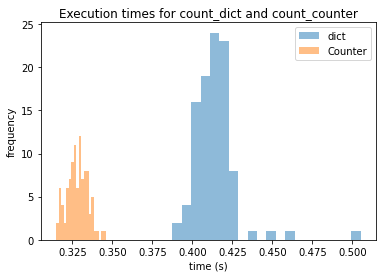

In [38]:
# run this experiment 100 times and plot the two distributions of execution times.
import timeit
import numpy as np
import matplotlib.pyplot as plt

def timeit_dict():
    count_dict('t8.shakespeare.txt')

def timeit_counter():
    count_words('t8.shakespeare.txt')

dict_times = np.array(timeit.repeat(timeit_dict, repeat=100, number=1))
counter_times = np.array(timeit.repeat(timeit_counter, repeat=100, number=1))

plt.hist(dict_times, bins=20, alpha=0.5, label='dict')
plt.hist(counter_times, bins=20, alpha=0.5, label='Counter')
plt.legend(loc='upper right')

plt.xlabel('time (s)')
plt.ylabel('frequency')

plt.title('Execution times for count_dict and count_counter')
plt.show()



In [39]:
# compute the mean and standard deviation of the two distributions
print('dict: mean = {:.3f}, std = {:.3f}'.format(dict_times.mean(), dict_times.std()))
print('counter: mean = {:.3f}, std = {:.3f}'.format(counter_times.mean(), counter_times.std()))


dict: mean = 0.413, std = 0.014
counter: mean = 0.328, std = 0.006
